In [27]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [28]:
# Generage sample dataset

np.random.seed(42)
random.seed(42)

# Define the number of samples
num_samples = 1000

transaction_ids = [f'TID{str(i).zfill(6)}' for i in range(num_samples)]
customer_ids = [f'CUST{str(random.randint(1, 100))}' for _ in range(num_samples)]
transaction_dates = [datetime.now() - timedelta(days=random.randint(1, 365)) for _ in range(num_samples)]
transaction_amounts = np.round(np.random.uniform(1, 1000, size=num_samples), 2)

# Randomly generate transaction types and merchant categories
transaction_types = np.random.choice(['purchase', 'withdrawal', 'refund'], size=num_samples)
merchant_categories = np.random.choice(['groceries', 'electronics', 'clothing', 'dining', 'entertainment'], size=num_samples)

# Generate locations (simulated as random city names)
locations = np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], size=num_samples)

# Introduce fraudulent transactions (let's say 5% of the dataset)
num_fraudulent = int(num_samples * 0.05)
fraud_indices = random.sample(range(num_samples), num_fraudulent)

# Mark transactions as fraudulent based on the indices
fraudulent = np.zeros(num_samples, dtype=int)
fraudulent[fraud_indices] = 1

# Create the DataFrame
credit_card_data = pd.DataFrame({
    'Transaction ID': transaction_ids,
    'Customer ID': customer_ids,
    'Transaction Date': transaction_dates,
    'Transaction Amount': transaction_amounts,
    'Transaction Type': transaction_types,
    'Merchant Category': merchant_categories,
    'Location': locations,
    'Fraudulent': fraudulent
})

# Save the dataset to a CSV file
credit_card_data.to_csv('credit_card_dataset.csv', index=False)


EXPLORE THE DATASET

In [29]:
credit_card_data.head()

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Transaction Type,Merchant Category,Location,Fraudulent
0,TID000000,CUST82,2024-07-16 00:56:54.162904,375.17,refund,dining,Chicago,0
1,TID000001,CUST15,2024-05-14 00:56:54.162904,950.76,withdrawal,entertainment,Houston,0
2,TID000002,CUST4,2024-10-08 00:56:54.162904,732.26,refund,dining,Chicago,0
3,TID000003,CUST95,2023-10-19 00:56:54.162904,599.06,refund,electronics,New York,0
4,TID000004,CUST36,2024-01-16 00:56:54.162904,156.86,purchase,dining,Houston,0


In [30]:
credit_card_data.describe(include = 'all')

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Transaction Type,Merchant Category,Location,Fraudulent
count,1000,1000,1000,1000.000000,1000,1000,1000,1000.000000
unique,1000,100,NaN,NaN,3,5,5,NaN
top,TID000000,CUST32,NaN,NaN,withdrawal,dining,New York,NaN
freq,1,20,NaN,NaN,343,220,215,NaN
mean,NaN,NaN,2024-04-10 10:40:06.170206208,490.766340,NaN,NaN,NaN,0.050000
min,NaN,NaN,2023-10-17 00:56:54.173091,5.630000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,2024-01-06 00:56:54.172962816,236.737500,NaN,NaN,NaN,0.000000
50%,NaN,NaN,2024-04-08 00:56:54.173091072,497.310000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,2024-07-17 06:56:54.170544384,744.572500,NaN,NaN,NaN,0.000000
max,NaN,NaN,2024-10-15 00:56:54.162904,999.720000,NaN,NaN,NaN,1.000000


In [31]:
credit_card_data.isna().sum()

Transaction ID        0
Customer ID           0
Transaction Date      0
Transaction Amount    0
Transaction Type      0
Merchant Category     0
Location              0
Fraudulent            0
dtype: int64

In [32]:
credit_card_data.duplicated().sum()

0

In [33]:
credit_card_data.dtypes

Transaction ID                object
Customer ID                   object
Transaction Date      datetime64[ns]
Transaction Amount           float64
Transaction Type              object
Merchant Category             object
Location                      object
Fraudulent                     int32
dtype: object

In [34]:
Faud_group = credit_card_data.groupby('Fraudulent').agg(
    Total_Amount=('Transaction Amount', 'sum'),
    Count=('Transaction Amount', 'count')
)
print(Faud_group)

            Total_Amount  Count
Fraudulent                     
0              467707.72    950
1               23058.62     50


In [35]:
notfraud_tran = credit_card_data[credit_card_data['Fraudulent']==0]
fraud_tran = credit_card_data[credit_card_data['Fraudulent']==1]

In [36]:
notfraud_tran.describe(include='all')

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Transaction Type,Merchant Category,Location,Fraudulent
count,950,950,950,950.000000,950,950,950,950.0
unique,950,100,NaN,NaN,3,5,5,NaN
top,TID000000,CUST32,NaN,NaN,withdrawal,dining,New York,NaN
freq,1,18,NaN,NaN,332,207,204,NaN
mean,NaN,NaN,2024-04-11 09:59:33.328054528,492.323916,NaN,NaN,NaN,0.0
min,NaN,NaN,2023-10-17 00:56:54.173091,5.630000,NaN,NaN,NaN,0.0
25%,NaN,NaN,2024-01-07 00:56:54.162904064,234.232500,NaN,NaN,NaN,0.0
50%,NaN,NaN,2024-04-09 12:56:54.172185344,500.475000,NaN,NaN,NaN,0.0
75%,NaN,NaN,2024-07-18 00:56:54.172253440,746.147500,NaN,NaN,NaN,0.0
max,NaN,NaN,2024-10-15 00:56:54.162904,999.720000,NaN,NaN,NaN,0.0


In [37]:
fraud_tran.describe(include='all')

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Transaction Type,Merchant Category,Location,Fraudulent
count,50,50,50,50.000000,50,50,50,50.0
unique,50,38,NaN,NaN,3,5,5,NaN
top,TID000044,CUST60,NaN,NaN,refund,dining,Houston,NaN
freq,1,3,NaN,NaN,23,13,12,NaN
mean,NaN,NaN,2024-03-22 23:30:30.171089664,461.172400,NaN,NaN,NaN,1.0
min,NaN,NaN,2023-10-18 00:56:54.173091,16.440000,NaN,NaN,NaN,1.0
25%,NaN,NaN,2024-01-02 12:56:54.172638208,250.250000,NaN,NaN,NaN,1.0
50%,NaN,NaN,2024-03-24 12:56:54.172185344,419.500000,NaN,NaN,NaN,1.0
75%,NaN,NaN,2024-05-22 00:56:54.170259968,682.945000,NaN,NaN,NaN,1.0
max,NaN,NaN,2024-09-27 00:56:54.162904,954.100000,NaN,NaN,NaN,1.0


In [38]:

# Ensure 'Transaction Date' is a datetime type
fraud_tran.loc[:, 'Transaction Date'] = pd.to_datetime(fraud_tran['Transaction Date'])

# Extract Month-Year for grouping
fraud_tran.loc[:, 'Month_Year'] = fraud_tran['Transaction Date'].dt.to_period('M')

# Function to group data by a specified column
def group_fraud_data(credit_card_data, group_col):
    return credit_card_data.groupby(group_col).agg(
        Total_Amount=('Transaction Amount', 'sum'),
        Count=('Transaction Amount', 'count')
    ).reset_index()

# Grouping data
fraud_date = group_fraud_data(fraud_tran, 'Month_Year')
fraud_type = group_fraud_data(fraud_tran, 'Transaction Type')
cat_type = group_fraud_data(fraud_tran, 'Merchant Category')
location = group_fraud_data(fraud_tran, 'Location')

# Sort Month-Year and convert to string format
fraud_date = fraud_date.sort_values(by='Month_Year').reset_index(drop=True)
fraud_date['Month_Year'] = fraud_date['Month_Year'].dt.strftime('%m.%Y')

# Print the results to verify
print("Fraud Date:\n", fraud_date)
print("\nFraud Type:\n", fraud_type)
print("\nMerchant Category:\n", cat_type)
print("\nLocation:\n", location)

Fraud Date:
    Month_Year  Total_Amount  Count
0     10.2023       2654.20      4
1     11.2023       1388.50      3
2     12.2023       2625.24      5
3     01.2024       1930.26      5
4     02.2024       2158.91      4
5     03.2024       2995.07      7
6     04.2024       1308.99      4
7     05.2024       2668.01      6
8     06.2024       1147.30      2
9     07.2024        790.04      4
10    08.2024       1610.89      3
11    09.2024       1781.21      3

Fraud Type:
   Transaction Type  Total_Amount  Count
0         purchase       8219.58     16
1           refund      10062.95     23
2       withdrawal       4776.09     11

Merchant Category:
   Merchant Category  Total_Amount  Count
0          clothing       4947.27     10
1            dining       5830.24     13
2       electronics       2211.39      5
3     entertainment       4674.24     11
4         groceries       5395.48     11

Location:
       Location  Total_Amount  Count
0      Chicago       4029.77      9
1      

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24548\188347682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_tran.loc[:, 'Month_Year'] = fraud_tran['Transaction Date'].dt.to_period('M')


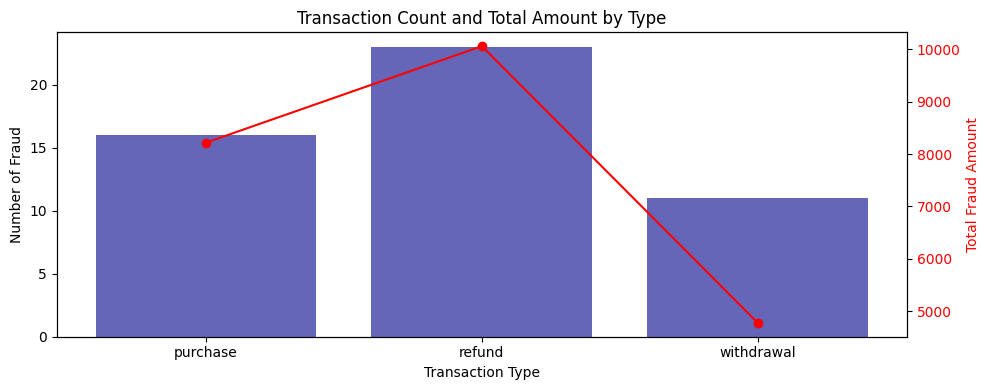

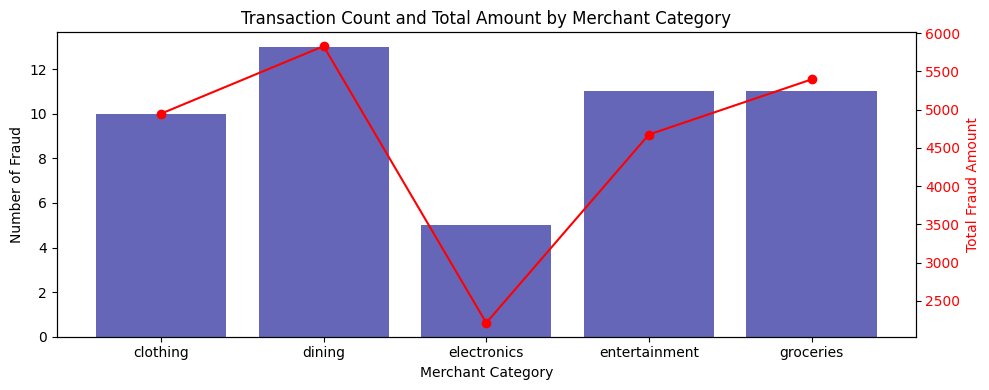

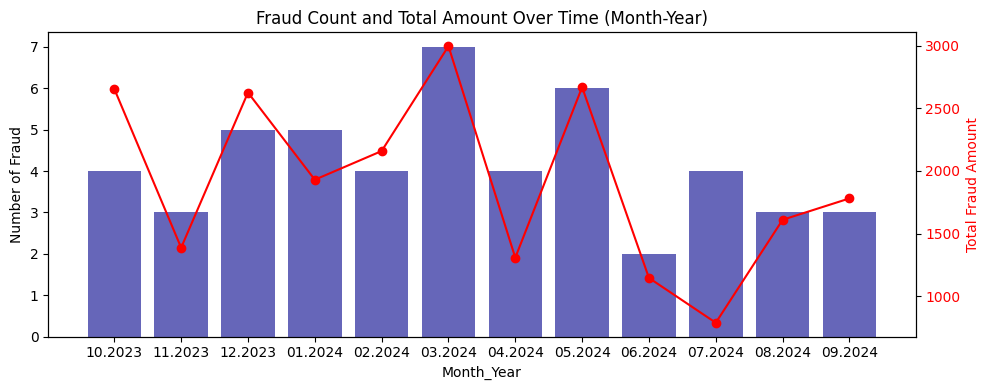

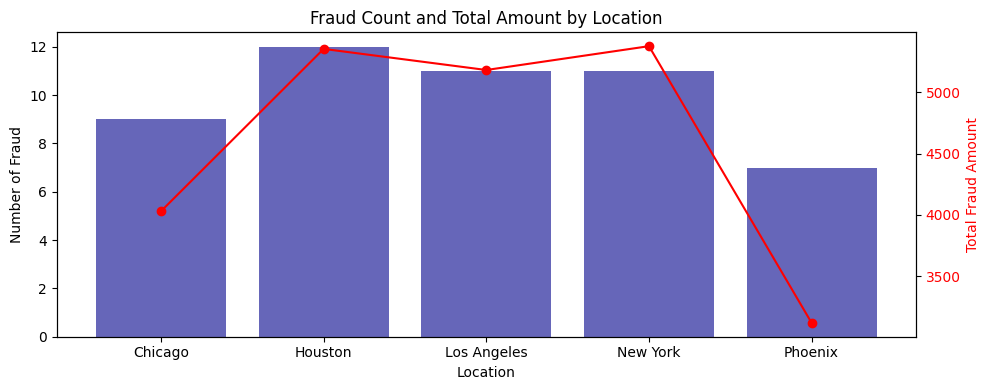

In [39]:

# Define a plotting function
def plot_fraud_data(data, x_col, y_count, y_total, title):
    fig, ax1 = plt.subplots(figsize=(10, 4))
    
    # Create a bar chart for Count
    ax1.bar(data[x_col], data[y_count], color='darkblue', alpha=0.6, label='Count')
    ax1.set_xlabel(x_col)
    ax1.set_ylabel('Number of Fraud')
    
    # Create a second y-axis to plot the Total Amount
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Total Fraud Amount', color='red')
    ax2.plot(data[x_col], data[y_total], color='red', marker='o', label='Total Amount')
    ax2.tick_params(axis='y', labelcolor='red')

    # Adding titles and legends
    plt.title(title)
    fig.tight_layout()  # To prevent clipping of ylabel
    plt.show()

# Plotting using the defined function
plot_fraud_data(fraud_type, 'Transaction Type', 'Count', 'Total_Amount', 'Transaction Count and Total Amount by Type')
plot_fraud_data(cat_type, 'Merchant Category', 'Count', 'Total_Amount', 'Transaction Count and Total Amount by Merchant Category')
plot_fraud_data(fraud_date, 'Month_Year', 'Count', 'Total_Amount', 'Fraud Count and Total Amount Over Time (Month-Year)')
plot_fraud_data(location, 'Location', 'Count', 'Total_Amount', 'Fraud Count and Total Amount by Location')

In [40]:
import folium

# Filter fraudulent transactions and group by location
fraud_counts = fraud_tran.groupby('Location').size().reset_index(name='Fraud_Count')

# Sample locations and their coordinates (latitude, longitude)
location_coords = {
    'New York': (40.7128, -74.0060),
    'Los Angeles': (34.0522, -118.2437),
    'Chicago': (41.8781, -87.6298),
    'Phoenix': (33.4484, -112.0740),  # Coordinates for Phoenix
    'Houston': (29.7604, -95.3698)    # Coordinates for Houston
}

# Create a Folium map centered around the average coordinates
map_center = [39.8283, -98.5795]  # Centered around the ontinental US
folium_map = folium.Map(location=map_center, zoom_start=4)

# Determine maximum fraud count for marker size scaling
max_fraud_count = fraud_counts['Fraud_Count'].max()

# Add markers for each location with fraud counts
for index, row in fraud_counts.iterrows():
    location = row['Location']
    fraud_count = row['Fraud_Count']
    
    if location in location_coords:
        lat, lon = location_coords[location]
        
        # Scale the marker size (you can adjust the scaling factor as needed)
        radius = (fraud_count / max_fraud_count) * 30  # Scale factor for marker size
        
        folium.CircleMarker(
            location=[lat, lon],
            radius=radius,  # Set radius based on fraud count
            popup=f"{location}: {fraud_count} fraudulent transactions",
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(folium_map)

# Save the map to an HTML file
folium_map.save('fraud_transactions_map.html')

folium_map

In [41]:
credit_card_data['Customer ID'].unique().shape

(100,)

In [42]:
credit_card_data.head()

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Transaction Type,Merchant Category,Location,Fraudulent
0,TID000000,CUST82,2024-07-16 00:56:54.162904,375.17,refund,dining,Chicago,0
1,TID000001,CUST15,2024-05-14 00:56:54.162904,950.76,withdrawal,entertainment,Houston,0
2,TID000002,CUST4,2024-10-08 00:56:54.162904,732.26,refund,dining,Chicago,0
3,TID000003,CUST95,2023-10-19 00:56:54.162904,599.06,refund,electronics,New York,0
4,TID000004,CUST36,2024-01-16 00:56:54.162904,156.86,purchase,dining,Houston,0


In [43]:
credit_card_data.groupby(['Customer ID', 'Fraudulent']).size().reset_index(name='Count')

,Customer ID,Fraudulent,Count
0,CUST1,0,9
1,CUST1,1,1
2,CUST10,0,10
3,CUST100,0,8
4,CUST11,0,11
...,...,...,...
133,CUST97,0,12
134,CUST97,1,1
135,CUST98,0,8
136,CUST98,1,2


In [44]:
import sqlite3

#  Connect to the SQLite database 
conn = sqlite3.connect('credit_card_data.db')  
cursor = conn.cursor()

#  Create the CreditCardTransactions table
query = '''
    CREATE TABLE IF NOT EXISTS CreditCardTransactions (
    TransactionID INT PRIMARY KEY,
    CustomerID INT,
    TransactionDate DATE,
    TransactionAmount DECIMAL(10, 2),
    TransactionType VARCHAR(50),
    MerchantCategory VARCHAR(100),
    Location VARCHAR(100),
    Fraudulent BOOLEAN
);'''
cursor.execute(query)

# Insert the DataFrame into the database
credit_card_data.to_sql('CreditCardTransactions', conn, if_exists='replace', index=False)



1000

In [45]:

query = 'SELECT * FROM CreditCardTransactions;'
result = pd.read_sql(query, conn)

# Display the result of the query
print(result)

    Transaction ID Customer ID            Transaction Date  \
0        TID000000      CUST82  2024-07-16 00:56:54.162904   
1        TID000001      CUST15  2024-05-14 00:56:54.162904   
2        TID000002       CUST4  2024-10-08 00:56:54.162904   
3        TID000003      CUST95  2023-10-19 00:56:54.162904   
4        TID000004      CUST36  2024-01-16 00:56:54.162904   
..             ...         ...                         ...   
995      TID000995      CUST13  2024-09-26 00:56:54.173091   
996      TID000996      CUST25  2023-11-12 00:56:54.173091   
997      TID000997      CUST38  2024-04-26 00:56:54.173091   
998      TID000998      CUST30  2023-12-04 00:56:54.173091   
999      TID000999      CUST47  2024-08-09 00:56:54.173091   

     Transaction Amount Transaction Type Merchant Category     Location  \
0                375.17           refund            dining      Chicago   
1                950.76       withdrawal     entertainment      Houston   
2                732.26       

In [46]:
query = '''
SELECT 
    `Customer ID`, 
    `Fraudulent`, 
    COUNT(*) AS Fraud_Count, 
    SUM(`Transaction Amount`) AS Total_Transaction_Amount 
FROM 
    CreditCardTransactions 
GROUP BY 
    `Customer ID`, `Fraudulent`
HAVING `Fraudulent` = 1
ORDER BY `Fraudulent` desc, `Fraud_Count` desc, `Total_Transaction_Amount` desc, `Customer ID`;
'''
customer = pd.read_sql(query, conn)

In [47]:
print(type(customer))
print(customer.shape)
customer.head()

<class 'pandas.core.frame.DataFrame'>
(38, 4)


,Customer ID,Fraudulent,Fraud_Count,Total_Transaction_Amount
0,CUST60,1,3,1378.70
1,CUST21,1,2,1678.99
2,CUST63,1,2,1444.52
3,CUST59,1,2,1408.76
4,CUST66,1,2,1323.64


In [48]:
customer.describe(include='all')

,Customer ID,Fraudulent,Fraud_Count,Total_Transaction_Amount
count,38,38.0,38.000000,38.000000
unique,38,NaN,NaN,NaN
top,CUST60,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,1.0,1.315789,606.805789
std,NaN,0.0,0.525319,430.483571
min,NaN,1.0,1.000000,16.440000
25%,NaN,1.0,1.000000,276.465000
50%,NaN,1.0,1.000000,567.780000
75%,NaN,1.0,2.000000,823.090000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24548\4007379874.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(customer['Customer ID'], rotation=45, ha='right')  # Use ax.set_xticklabels() for better control


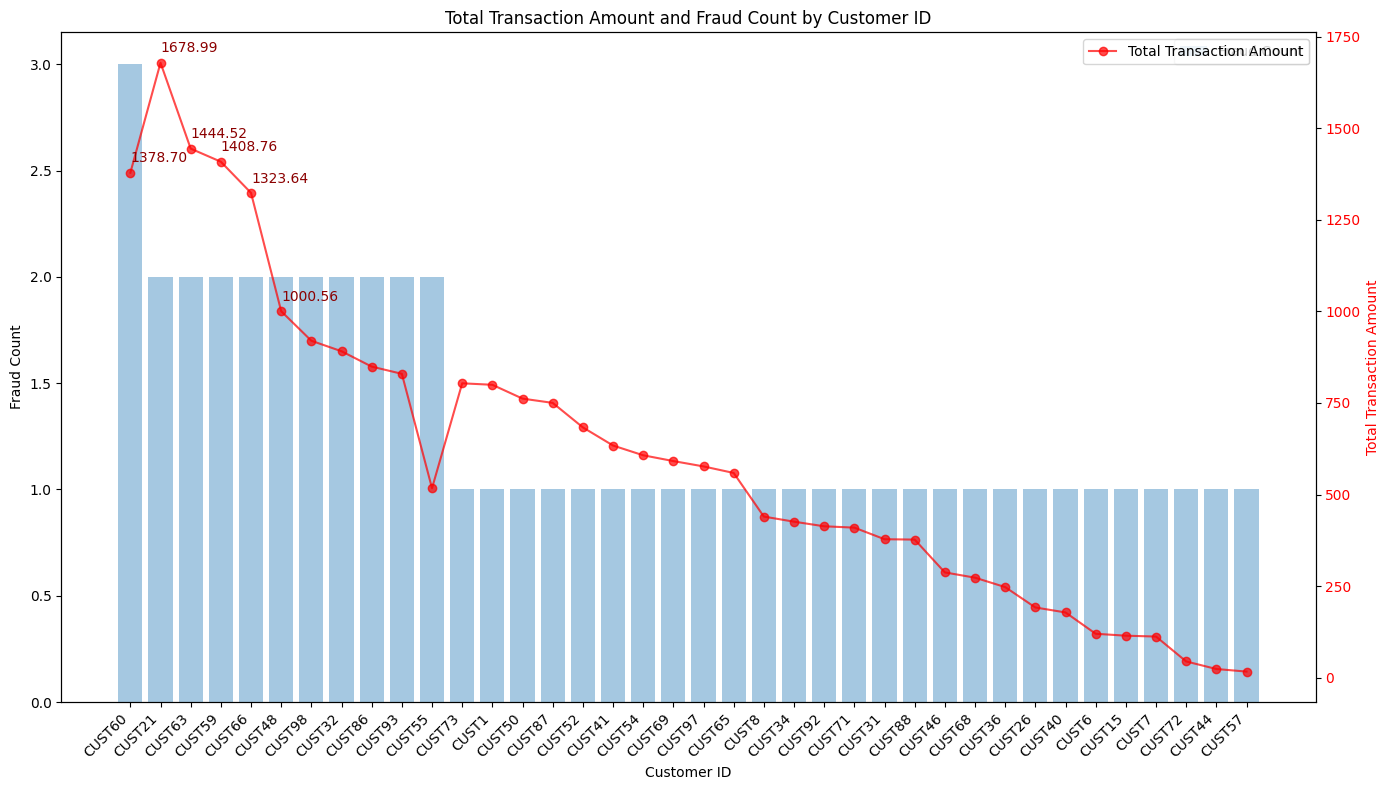

In [49]:
# Create a new figure with specified size
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(customer['Customer ID'], customer['Fraud_Count'], label='Fraud Count', alpha = 0.4)
ax.set_xlabel('Customer ID')
ax.set_ylabel('Fraud Count')
ax.tick_params(axis='y')

# Create a second y-axis for Total Transaction Amount
ax2 = ax.twinx()  
ax2.plot(customer['Customer ID'], customer['Total_Transaction_Amount'], color='red', marker='o', label='Total Transaction Amount', alpha =0.7)
ax2.set_ylabel('Total Transaction Amount', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legends
plt.title('Total Transaction Amount and Fraud Count by Customer ID')
ax.legend(loc='upper right')  # Legend for the bar chart
ax2.legend(loc='upper right')  # Legend for the line chart

# Rotate x-axis labels
ax.set_xticklabels(customer['Customer ID'], rotation=45, ha='right')  # Use ax.set_xticklabels() for better control

# Annotate the line chart with the total transaction amounts only if > 1000
for i, amount in enumerate(customer['Total_Transaction_Amount']):
    if amount > 1000:  # Only annotate if the amount is greater than 1000
        ax2.text(i, amount + 20, f'{amount:.2f}', color = 'darkred',ha='left', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of x-labels
plt.xticks(rotation=45)
plt.show()

BUILD MODEL

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression




In [51]:
label_encoders = {}
for column in ['Transaction Date','Customer ID', 'Transaction Type', 'Merchant Category', 'Location']:
    le = LabelEncoder()
    credit_card_data[column] = le.fit_transform(credit_card_data[column])
    label_encoders[column] = le

In [52]:
X = credit_card_data.drop(columns=['Transaction ID', 'Fraudulent'])
y = credit_card_data['Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Model 3: Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

Logistic Regression Accuracy: 0.95
Random Forest Accuracy: 0.95
Gradient Boosting Accuracy: 0.95


Confusion Matrix:
 [[191   0]
 [  9   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


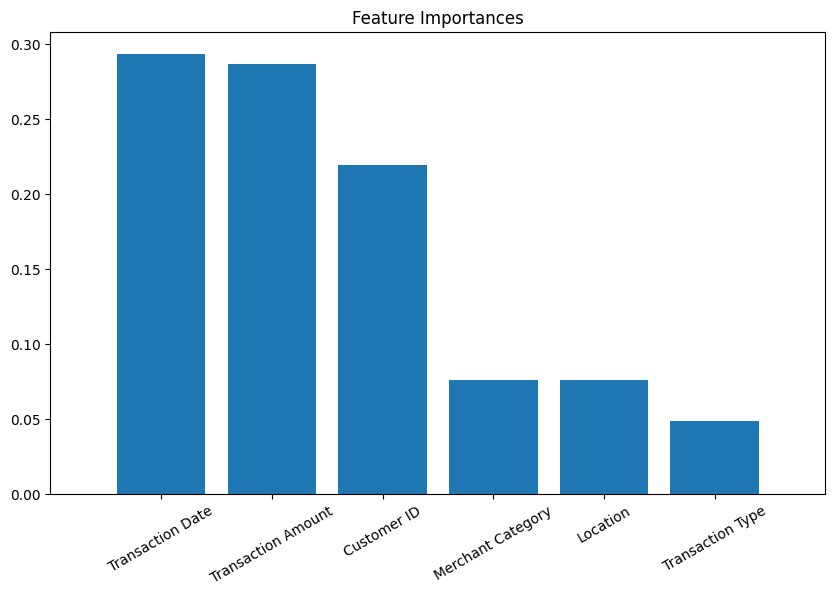

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_log) 
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred_log))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=30)
plt.xlim([-1, X.shape[1]])
plt.show()

In [56]:
log_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])